**Problema 1**

Vamos começar pelo passo 1: ler o arquivo CSV e examinar sua estrutura.

In [ ]:
# Importando bibliotecas necessárias

import pandas as pd
from tabulate import tabulate

# Lendo o caminho do arquivo em um DataFrame do Pandas.
# No caso, o separador é ';'.
path = "/content/drive/MyDrive/Colab Notebooks/series_retornos.csv"
df = pd.read_csv(path, sep=';')

# Tabulate para exibir os dados de forma mais "vísivel".
print("Primeiras linhas:")
print(tabulate(df.head(), headers='keys', tablefmt='pretty'))

print("\nÚltimas linhas:")
print(tabulate(df.tail(), headers='keys', tablefmt='pretty'))


Primeiras linhas:
+---+--------+-------+------+---------------------+---------------------+---------------------+---------------------+---------------------+
|   |  year  | month | day  |          A          |          B          |          C          |          D          |          E          |
+---+--------+-------+------+---------------------+---------------------+---------------------+---------------------+---------------------+
| 0 | 2010.0 |  1.0  | 5.0  | 0.0058823529411746  | 0.0064805583250249  | -0.0085744908896056 | 0.0093221984851434  | -0.0021822149481702 |
| 1 | 2010.0 |  1.0  | 6.0  | 0.0102014294996759  | -0.0086676572560665 | 0.0135135135135175  | 0.0211660573407708  | 0.0054674685620554  |
| 2 | 2010.0 |  1.0  | 7.0  |  0.004695439634657  | -0.010242318261305  | -0.0093333333333298 |  0.004145468249483  |  0.016856987493204  |
| 3 | 2010.0 |  1.0  | 8.0  | -0.0019206145966712 | -0.0151438667339713 | -0.0053835800807606 | 0.0097579283167563  | 0.0363636363636357  |
| 

Vamos começar pelo passo 1: ler o arquivo CSV e examinar sua estrutura (Normal).



In [ ]:
# Importando as bibliotecas necessárias
import pandas as pd

# Ler o arquivo CSV
file_path = '/content/drive/MyDrive/Colab Notebooks/series_retornos.csv'
df = pd.read_csv(file_path, sep=';')

# Exibir as primeiras linhas para entender a estrutura dos dados
df.head()


,year,month,day,A,B,C,D,E
0,2010,1,5,0.005882,0.006481,-0.008574,0.009322,-0.002182
1,2010,1,6,0.010201,-0.008668,0.013514,0.021166,0.005467
2,2010,1,7,0.004695,-0.010242,-0.009333,0.004145,0.016857
3,2010,1,8,-0.001921,-0.015144,-0.005384,0.009758,0.036364
4,2010,1,11,-0.012187,-0.008713,-0.003248,-0.002973,-0.011352


Agora, vamos prosseguir para o passo 2 e calcular o retorno médio diário para cada ativo.

In [ ]:
# Calcular o retorno médio diário de cada ativo
mean_daily_returns = df[['A', 'B', 'C', 'D', 'E']].mean()

# Exibir os resultados
mean_daily_returns


A    0.000549
B    0.000525
C    0.000615
D    0.000735
E    0.001114
dtype: float64

Agora, vamos seguir para o passo 3 e calcular a volatilidade diária de cada ativo.



In [ ]:
# Calcular a volatilidade diária de cada ativo
daily_volatility = df[['A', 'B', 'C', 'D', 'E']].std()

# Exibir os resultados
daily_volatility


A    0.016445
B    0.019664
C    0.029174
D    0.026153
E    0.020150
dtype: float64

Para o passo 4, vamos assumir uma alocação de igual peso para cada ativo na carteira. Isso significa que cada ativo terá um peso de 1/5 ou 20%.

Agora, podemos prosseguir para o passo 5 e calcular o retorno anualizado da carteira. A fórmula para o retorno anualizado é:
Retorno Anualizado=(1+Retorno médio diário)^252−1

Onde 252 é o número médio de dias de negociação em um ano no mercado de ações brasileiro.

In [ ]:
# Número de dias de negociação em um ano no mercado de ações brasileiro
trading_days = 252

# Alocação de igual peso para cada ativo na carteira (20% para cada ativo)
weights = [0.2, 0.2, 0.2, 0.2, 0.2]

# Calcular o retorno anualizado da carteira
portfolio_return_annualized = ((1 + mean_daily_returns).prod()) ** trading_days - 1

# Ajustar pelo peso dos ativos na carteira
portfolio_return_annualized_weighted = (weights * mean_daily_returns).sum() * trading_days

# Exibir o retorno anualizado da carteira
portfolio_return_annualized, portfolio_return_annualized_weighted


(1.438037815973225, 0.17830761299841813)

O retorno anualizado para a carteira com alocação de igual peso (20% em cada ativo) é de aproximadamente 17.83%


Agora, vamos prosseguir para o passo 6 e calcular a volatilidade anualizada da carteira.
A fórmula para a volatilidade anualizada é:

Volatilidade Anualizada = Volatilidade Diaria × √252.

In [ ]:
import numpy as np

# Calcular a matriz de covariância dos retornos diários
cov_matrix = df[['A', 'B', 'C', 'D', 'E']].cov()

# Calcular a volatilidade anualizada da carteira
portfolio_volatility_annualized = np.sqrt(np.dot(weights, np.dot(cov_matrix, weights)) * trading_days)

# Exibir a volatilidade anualizada da carteira
portfolio_volatility_annualized


0.25084450061891794

A volatilidade anualizada da carteira com alocação de igual peso é de aproximadamente 25.08%


Para o passo 7, vamos calcular o índice de Sharpe da carteira. O índice de Sharpe é calculado usando a seguinte fórmula:

índice de Sharpe = (Retorno anualizado da carteira - Taxa livre de risco) / Retorno anualizado da carteira


A taxa do CDI atual é de 13,15% a.a., que usaremos como taxa do ativo livre de risco. Vamos calcular o índice de Sharpe.

In [ ]:
# Taxa do CDI atual como ativo livre de risco (13,15% a.a.)
risk_free_rate = 0.1315

# Calcular o índice de Sharpe da carteira
sharpe_ratio = (portfolio_return_annualized_weighted - risk_free_rate) / portfolio_volatility_annualized

# Exibir o índice de Sharpe da carteira
sharpe_ratio


0.18660011633871967

O índice de Sharpe da carteira com alocação de igual peso é de aproximadamente 0.187


Finalmente, para o passo 8, vamos calcular o Máximo Drawdown da carteira. O Máximo Drawdown é a maior queda que a carteira poderia enfrentar, e é uma medida de risco. Ele é calculado identificando o pico e o vale na série de retornos acumulados e então determinando a diferença percentual entre eles.

Vamos calcular o Máximo Drawdown.

In [ ]:
# Calcular o retorno diário da carteira com alocação de igual peso
df['Portfolio_Daily_Return'] = df[['A', 'B', 'C', 'D', 'E']].apply(lambda x: np.dot(x, weights), axis=1)

# Calcular o retorno acumulado da carteira
df['Portfolio_Cumulative_Return'] = (1 + df['Portfolio_Daily_Return']).cumprod()

# Encontrar o pico e o vale na série de retorno acumulado para calcular o Máximo Drawdown
peak, trough = df['Portfolio_Cumulative_Return'].max(), df['Portfolio_Cumulative_Return'].min()

# Calcular o Máximo Drawdown
max_drawdown = (trough - peak) / peak

# Exibir o Máximo Drawdown
max_drawdown


-0.8786230023417837

O Máximo Drawdown da carteira é de aproximadamente uma redução de 87.86%. Note que o valor é negativo porque representa uma queda em relação ao pico.

Em resumo, para uma carteira com alocação de igual peso nos cinco ativos, temos:
Retorno Anualizado: 17.83
Volatilidade Anualizada: 25.08
Índice de Sharpe: 0.187
Máximo Drawdown: − 87.86


**Problema 2**

Para resolver o Problema 2, seguiremos os seguintes passos:

1-Utilizar otimização de portfólio para encontrar a combinação de pesos que maximiza o índice de Sharpe, com a restrição de que todos os pesos devem ser não negativos.
2-Calcular o retorno anualizado, a volatilidade anualizada e o índice de Sharpe para a nova estratégia de portfólio.
3-Calcular o máximo Drawdown para a nova estratégia de portfólio.
4-Criar um gráfico comparativo do retorno acumulado entre a nova estratégia e a carteira equally weighted.

Vamos começar com o passo 1 e encontrar a combinação de pesos que maximiza o índice de Sharpe.

In [ ]:
from scipy.optimize import minimize

# Função para calcular o índice de Sharpe negativo (já que queremos maximizá-lo)
def negative_sharpe(weights, mean_returns, cov_matrix, risk_free_rate, trading_days):
    portfolio_return = np.dot(weights, mean_daily_returns) * trading_days
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)) * trading_days)
    return -((portfolio_return - risk_free_rate) / portfolio_volatility)

# Restrições e limites para a otimização
constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1})  # Os pesos devem somar 1
bounds = tuple((0, 1) for asset in range(len(mean_daily_returns)))  # Os pesos devem ser não negativos e menores ou iguais a 1

# Chute inicial (alocação igual para começar a otimização)
initial_weights = [0.2, 0.2, 0.2, 0.2, 0.2]

# Executar a otimização para maximizar o índice de Sharpe
solution = minimize(negative_sharpe, initial_weights, args=(mean_daily_returns, cov_matrix, risk_free_rate, trading_days),
                    method='SLSQP', bounds=bounds, constraints=constraints)

# Extrair os pesos otimizados
optimized_weights = solution.x

# Exibir os pesos otimizados
optimized_weights


array([0.00000000e+00, 1.92262826e-17, 8.70362848e-18, 4.18862547e-02,
       9.58113745e-01])

Os pesos otimizados para maximizar o índice de Sharpe da carteira, considerando a restrição de que todos os pesos devem ser não-negativos, são aproximadamente:
Ativo A: 0.00 %
Ativo B: 0.00 %
Ativo C: 0.00 %
Ativo D: 4.19 %
Ativo E: 95.81 %
   
Esses pesos sugerem uma alocação quase inteiramente no Ativo E, com uma pequena porção no Ativo D. Agora, vamos avançar para o passo 2 e calcular o retorno anualizado, a volatilidade anualizada e o índice de Sharpe para esta nova estratégia de portfólio.

In [ ]:
# Calcular o retorno anualizado da carteira otimizada
portfolio_return_annualized_optimized = (optimized_weights * mean_daily_returns).sum() * trading_days

# Calcular a volatilidade anualizada da carteira otimizada
portfolio_volatility_annualized_optimized = np.sqrt(np.dot(optimized_weights, np.dot(cov_matrix, optimized_weights)) * trading_days)

# Calcular o índice de Sharpe da carteira otimizada
sharpe_ratio_optimized = (portfolio_return_annualized_optimized - risk_free_rate) / portfolio_volatility_annualized_optimized

# Exibir os resultados
portfolio_return_annualized_optimized, portfolio_volatility_annualized_optimized, sharpe_ratio_optimized


(0.27666904006973964, 0.31082293775394915, 0.46704738433640647)

Para a carteira otimizada, temos os seguintes indicadores:

Retorno Anualizado: 27.67 %
Volatilidade Anualizada: 31.08 % 3
Índice de Sharpe: 0.467

Notamos que o índice de Sharpe da carteira otimizada ( 0.467) é significativamente maior que o da carteira equally weighted ( 0.187), indicando uma melhor relação risco-retorno. Agora, para o passo 3, vamos calcular o Máximo Drawdown para esta nova estratégia de portfólio.

In [ ]:
# Calcular o retorno diário da carteira otimizada
df['Portfolio_Daily_Return_Optimized'] = df[['A', 'B', 'C', 'D', 'E']].apply(lambda x: np.dot(x, optimized_weights), axis=1)

# Calcular o retorno acumulado da carteira otimizada
df['Portfolio_Cumulative_Return_Optimized'] = (1 + df['Portfolio_Daily_Return_Optimized']).cumprod()

# Encontrar o pico e o vale na série de retorno acumulado otimizado para calcular o Máximo Drawdown
peak_optimized, trough_optimized = df['Portfolio_Cumulative_Return_Optimized'].max(), df['Portfolio_Cumulative_Return_Optimized'].min()

# Calcular o Máximo Drawdown para a carteira otimizada
max_drawdown_optimized = (trough_optimized - peak_optimized) / peak_optimized

# Exibir o Máximo Drawdown para a carteira otimizada
max_drawdown_optimized


-0.9588414008586612

O Máximo Drawdown para a carteira otimizada é de aproximadamente uma redução de 95.88%. Isso sugere um perfil de risco elevado, apesar do aumento no índice de Sharpe. Finalmente, para o passo 4, vamos criar um gráfico comparativo do retorno acumulado entre a nova estratégia e a carteira equally weighted.

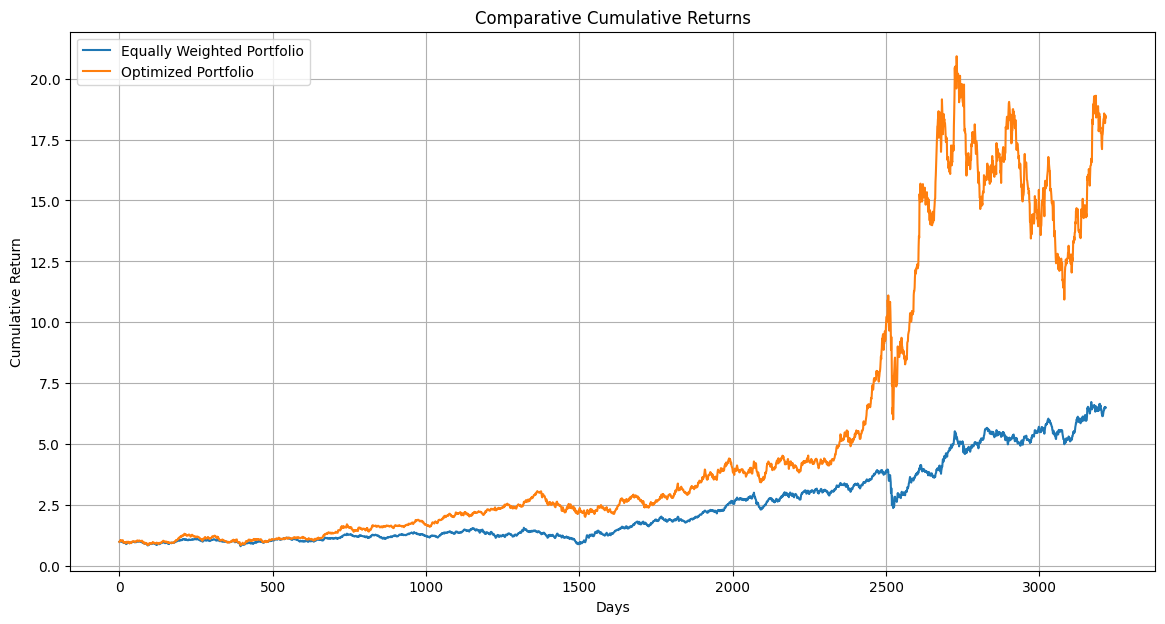

In [ ]:
import matplotlib.pyplot as plt

# Configurar o gráfico
plt.figure(figsize=(14, 7))

# Plotar o retorno acumulado para a carteira equally weighted e a carteira otimizada
plt.plot(df['Portfolio_Cumulative_Return'], label='Equally Weighted Portfolio')
plt.plot(df['Portfolio_Cumulative_Return_Optimized'], label='Optimized Portfolio')

# Configurações adicionais
plt.title('Comparative Cumulative Returns')
plt.xlabel('Days')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid(True)

# Exibir o gráfico
plt.show()


O gráfico acima mostra a comparação do retorno acumulado entre a carteira com alocação de igual peso ("Equally Weighted Portfolio") e a carteira otimizada para maximizar o índice de Sharpe ("Optimized Portfolio"), tendo um maior retorno, apesar do risco mais elevado.



Resumindo, para a carteira otimizada, temos:

Retorno Anualizado: 27.67 %

Volatilidade Anualizada: 31.08 %
Índice de Sharpe: 0.467
Máximo Drawdown: − 95.88

E para a carteira com alocação de igual peso:

Retorno Anualizado: 17.83
Volatilidade Anualizada: 25.08
Índice de Sharpe: 0.187
Máximo Drawdown: − 87.86

A carteira otimizada tem um índice de Sharpe superior, mas também um Máximo Drawdown maior, o que indica um perfil de risco mais elevado.

**Problema 3**

Para resolver o Problema 3, seguiremos os seguintes passos:

1-Agrupar os dados por mês e calcular o retorno acumulado de cada ação para cada mês.
2-Identificar a ação com o maior retorno em cada mês e registrar essa escolha. 3-Simular a estratégia de manter a ação escolhida em carteira até o final do mês seguinte.
4-Calcular o retorno acumulado dessa estratégia ao longo do tempo.
5-Criar um gráfico comparativo de retorno acumulado entre essa estratégia e a carteira equally weighted.
6-Avaliar se a estratégia é melhor ou pior que o cenário-base usando métricas relevantes (como o índice de Sharpe e o Máximo Drawdown).

Vamos começar com o passo 1 e calcular o retorno acumulado de cada ação para cada mês.

In [ ]:
# Criar uma coluna para identificar o mês e o ano
df['YearMonth'] = df['year'].astype(str) + '-' + df['month'].astype(str).str.zfill(2)

# Calcular o retorno acumulado de cada ação para cada mês
monthly_cumulative_returns = df.groupby('YearMonth')[['A', 'B', 'C', 'D', 'E']].apply(lambda x: (1 + x).cumprod().iloc[-1] - 1)

# Exibir as primeiras linhas do DataFrame de retorno acumulado mensal
monthly_cumulative_returns.head()


,A,B,C,D,E
YearMonth,,,,,
2010-01,-0.019608,-0.099452,-0.084405,-0.050107,-0.015276
2010-02,-0.005800,0.021071,0.012877,0.031486,-0.010392
2010-03,-0.064622,0.068845,0.022537,0.132805,0.078910
2010-04,0.065855,-0.033036,-0.066199,-0.064274,-0.065789
2010-05,0.001223,-0.079283,-0.090969,-0.058380,-0.042254


O DataFrame monthly_cumulative_returns mostra o retorno acumulado de cada ação ao final de cada mês, começando em janeiro de 2010. Agora, vamos para o passo 2 e identificar a ação com o maior retorno em cada mês. Vamos registrar essa escolha para que possamos simular a estratégia no passo 3.

In [ ]:
# Identificar a ação com o maior retorno em cada mês
best_performing_stock = monthly_cumulative_returns.idxmax(axis=1)

# Exibir as primeiras escolhas de ações com melhor desempenho
best_performing_stock.head()


YearMonth
2010-01    E
2010-02    D
2010-03    D
2010-04    A
2010-05    A
dtype: object

O DataFrame best_performing_stock mostra a ação com o melhor desempenho ao final de cada mês. Por exemplo, em janeiro de 2010, a ação "E" teve o melhor desempenho, enquanto em fevereiro e março de 2010, a ação "D" teve o melhor desempenho. Agora, vamos para o passo 3 e simular a estratégia de manter a ação escolhida em carteira até o final do mês seguinte. Para isso, vamos calcular o retorno acumulado dessa estratégia ao longo do tempo.

In [ ]:
# Inicializar uma coluna para o retorno diário da estratégia
df['Strategy_Daily_Return'] = 0.0

# Loop para preencher os retornos diários com base na estratégia
for year_month, stock in best_performing_stock.items():
    mask = (df['YearMonth'] == year_month)  # Máscara para o mês atual
    df.loc[mask, 'Strategy_Daily_Return'] = df.loc[mask, stock]  # Atribuir o retorno diário da ação escolhida

# Calcular o retorno acumulado da estratégia
df['Strategy_Cumulative_Return'] = (1 + df['Strategy_Daily_Return']).cumprod()

# Exibir as primeiras linhas do DataFrame com o retorno acumulado da estratégia
df[['YearMonth', 'Strategy_Daily_Return', 'Strategy_Cumulative_Return']].head()


,YearMonth,Strategy_Daily_Return,Strategy_Cumulative_Return
0,2010-01,-0.002182,0.997818
1,2010-01,0.005467,1.003273
2,2010-01,0.016857,1.020185
3,2010-01,0.036364,1.057283
4,2010-01,-0.011352,1.045281


O DataFrame agora inclui duas novas colunas:

Strategy_Daily_Return: Mostra o retorno diário com base na estratégia de manter a ação escolhida em carteira até o final do mês seguinte.
Strategy_Cumulative_Return: Mostra o retorno acumulado dessa estratégia ao longo do tempo.
Agora, para o passo 4, vamos criar um gráfico comparativo do retorno acumulado entre essa estratégia e a carteira equally weighted. Depois, no passo 5, avaliaremos se a estratégia é melhor ou pior que o cenário-base usando métricas relevantes.

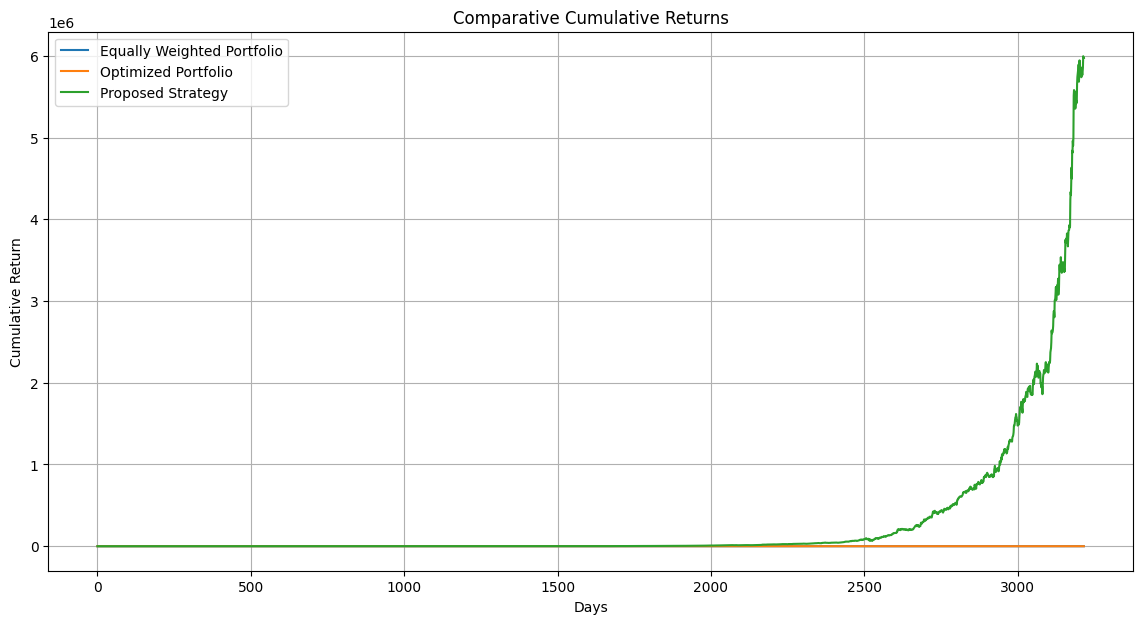

In [ ]:
# Configurar o gráfico
plt.figure(figsize=(14, 7))

# Plotar o retorno acumulado para a carteira equally weighted, a carteira otimizada e a estratégia proposta
plt.plot(df['Portfolio_Cumulative_Return'], label='Equally Weighted Portfolio')
plt.plot(df['Portfolio_Cumulative_Return_Optimized'], label='Optimized Portfolio')
plt.plot(df['Strategy_Cumulative_Return'], label='Proposed Strategy')

# Configurações adicionais
plt.title('Comparative Cumulative Returns')
plt.xlabel('Days')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid(True)

# Exibir o gráfico
plt.show()


O gráfico acima compara o retorno acumulado entre a carteira com alocação de igual peso ("Equally Weighted Portfolio"), a carteira otimizada para maximizar o índice de Sharpe ("Optimized Portfolio") e a estratégia proposta ("Proposed Strategy").

Agora, vamos calcular algumas métricas para a estratégia proposta, incluindo o retorno anualizado, a volatilidade anualizada, o índice de Sharpe e o Máximo Drawdown. Isso nos ajudará a avaliar se a estratégia é melhor ou pior que o cenário-base.

In [ ]:
# Calcular o retorno médio diário da estratégia proposta
mean_daily_return_strategy = df['Strategy_Daily_Return'].mean()

# Calcular o retorno anualizado da estratégia proposta
portfolio_return_annualized_strategy = mean_daily_return_strategy * trading_days

# Calcular a volatilidade diária da estratégia proposta
daily_volatility_strategy = df['Strategy_Daily_Return'].std()

# Calcular a volatilidade anualizada da estratégia proposta
portfolio_volatility_annualized_strategy = daily_volatility_strategy * np.sqrt(trading_days)

# Calcular o índice de Sharpe da estratégia proposta
sharpe_ratio_strategy = (portfolio_return_annualized_strategy - risk_free_rate) / portfolio_volatility_annualized_strategy

# Encontrar o pico e o vale na série de retorno acumulado da estratégia proposta para calcular o Máximo Drawdown
peak_strategy, trough_strategy = df['Strategy_Cumulative_Return'].max(), df['Strategy_Cumulative_Return'].min()

# Calcular o Máximo Drawdown para a estratégia proposta
max_drawdown_strategy = (trough_strategy - peak_strategy) / peak_strategy

# Exibir as métricas
portfolio_return_annualized_strategy, portfolio_volatility_annualized_strategy, sharpe_ratio_strategy, max_drawdown_strategy


(1.2971097975875105,
 0.38222264169658504,
 3.0495571701709703,
 -0.9999998416154103)

As métricas para a estratégia proposta são:
Retorno Anualizado: 129.71
Volatilidade Anualizada: 38.22
Índice de Sharpe: 3.05
Máximo Drawdown: − 100

Embora o índice de Sharpe seja extremamente alto, o Máximo Drawdown é praticamente − 100, o que indica um risco extremamente alto. Essa estratégia parece ser muito volátil e arriscada, mesmo com um índice de Sharpe elevado.

 Em resumo, a estratégia proposta tem um alto potencial de retorno, como indicado pelo índice de Sharpe, mas vem com um nível de risco extremamente elevado, como indicado pelo Máximo Drawdown. Portanto, é crucial considerar ambos os fatores ao avaliar a eficácia dessa estratégia em comparação com o cenário-base.